<a href="https://colab.research.google.com/gist/jonghank/ce2a27c0a07d01099a6226591db3ee13/an-extremely-short-cvxpy_tutorial_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An extremely short `cvxpy` tutorial

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\argmin}{{\text{argmin}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\E}{\mathbf{E}}
\newcommand{\var}{\mathbf{var}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$


__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

## What is `cvxpy`?

`cvxpy` is a Python-embedded modeling language for convex optimization problems. It automatically transforms the problem into standard form, calls a solver, and unpacks the results.

The code below solves a simple optimization problem in `cvxpy`:


In [1]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((2*x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print(f'status: {prob.status}')
print(f'optimal value: {prob.value}')
print(f'optimal var: x_opt={x.value}, y_opt={y.value}')

status: optimal
optimal value: 4.0
optimal var: x_opt=1.0, y_opt=6.280289122406169e-22


The status, which was assigned a value `optimal` by the solve method, tells us the problem was solved successfully. The optimal value (basically 4 here) is the minimum value of the objective over all choices of variables that satisfy the constraints. The last thing printed gives values of x and y (basically 1 and 0 respectively) that achieve the optimal objective.

`prob.solve()` returns the optimal value and updates `prob.status`, `prob.value`, and the `value` field of all the variables in the problem.

<br>

## Changing the problem

`Problems` are immutable, meaning they cannot be changed after they are created. To change the objective or constraints, create a new problem.

In [2]:
# Replace the objective.
prob2 = cp.Problem(cp.Maximize(x + y), prob.constraints)
print("optimal value", prob2.solve())

# Replace the constraint (x + y == 1).
constraints = [x + y <= 3] + prob2.constraints[1:]
prob3 = cp.Problem(prob2.objective, constraints)
print("optimal value", prob3.solve())

optimal value 0.9999999999945575
optimal value 2.9999999999746754


<br>

## Infeasible and unbounded problems

If a problem is infeasible or unbounded, the status field will be set to `infeasible` or `unbounded`, respectively. The value fields of the problem variables are not updated.

In [3]:
import cvxpy as cp

x = cp.Variable()

# An infeasible problem.
prob = cp.Problem(cp.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

# An unbounded problem.
prob = cp.Problem(cp.Minimize(x))
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf


Notice that for a minimization problem the optimal value is `inf` if infeasible and `-inf` if unbounded. For maximization problems the opposite is true.

<br>

## Other problem statuses

If the solver called by `cvxpy` solves the problem but to a lower accuracy than desired, the problem status indicates the lower accuracy achieved. The statuses indicating lower accuracy are

- `optimal_inaccurate`
- `unbounded_inaccurate`
- `infeasible_inaccurate`

The problem variables are updated as usual for the type of solution found (i.e., `optimal`, `unbounded`, or `infeasible`).

If the solver completely fails to solve the problem,`cvxpy` throws a `SolverError` exception. If this happens you should try using other solvers. 

CVXPY provides the following constants as aliases for the different status strings:

- `optimal`
- `infeasible`
- `unbounded`
- `optimal_inaccurate`
- `infeasible_inaccurate`
- `unbounded_inaccurate`

For example, to test if a problem was solved successfully, you would use

In [4]:
print(prob.status == 'optimal')
print(prob.status)

False
unbounded


<br>

## Vectors and matrices

Variables can be scalars, vectors, or matrices, meaning they are 0, 1, or 2 dimensional.


In [5]:
# A scalar variable.
a = cp.Variable()

# Vector variable with shape (5,).
x = cp.Variable(5)

# Matrix variable with shape (5, 1).
x = cp.Variable((5, 1))

# Matrix variable with shape (4, 7).
A = cp.Variable((4, 7))

You can use your numeric library of choice to construct matrix and vector constants. For instance, if x is a `cvxpy` `Variable` in the expression `A*x + b`, `A` and `b` could be `numpy` ndarrays, `scipy` sparse matrices, etc. `A` and `b` could even be different types.

Currently the following types may be used as constants:

- `numpy` ndarrays
- `numpy` matrices
- `scipy` sparse matrices

Here’s an example of a `cvxpy` problem with vectors and matrices:

In [6]:
# Solves a bounded least-squares problem.

import cvxpy as cp
import numpy as np

# Problem data.
m = 10
n = 5
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A@x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

print("Optimal value", prob.solve())
print("Optimal var")
print(x.value) # A numpy ndarray.


Optimal value 4.141338603672535
Optimal var
[-4.95922264e-21  6.07571976e-21  1.34643668e-01  1.24976681e-01
 -4.57130806e-21]


<br>

## Constraints

As shown in the example code, you can use `==`, `<=`, and `>=` to construct constraints in `cvxpy`. Equality and inequality constraints are elementwise, whether they involve scalars, vectors, or matrices. For example, together the constraints `0 <= x` and `x <= 1` mean that every entry of `x` is between `0` and `1`.

You can use matrix inequalities that represent semi-definite cone constraints, by expressing semi-definite cone inequalities.

You cannot construct inequalities with `<` and `>`. Strict inequalities don’t make sense in a real world setting. Also, you cannot chain constraints together, e.g., `0 <= x <= 1` or `x == y == 2`. The Python interpreter treats chained constraints in such a way that `cvxpy` cannot capture them. `cvxpy` will raise an exception if you write a chained constraint.

<br>

## Parameters

Parameters are symbolic representations of constants. The purpose of parameters is to change the value of a constant in a problem without reconstructing the entire problem.

Parameters can be vectors or matrices, just like variables. When you create a parameter you have the option of specifying attributes such as the sign of the parameter’s entries, whether the parameter is symmetric, etc. These attributes are used in Disciplined Convex Programming and are unknown unless specified. Parameters can be assigned a constant value any time after they are created. The constant value must have the same dimensions and attributes as those specified when the parameter was created.


In [7]:
# Positive scalar parameter.
m = cp.Parameter(nonneg=True)

# Column vector parameter with unknown sign (by default).
c = cp.Parameter(5)

# Matrix parameter with negative entries.
G = cp.Parameter((4, 7), nonpos=True)

# Assigns a constant value to G.
G.value = -np.ones((4, 7))

You can initialize a parameter with a value. The following code segments are equivalent:

In [8]:
# Create parameter, then assign value.
rho = cp.Parameter(nonneg=True)
rho.value = 2

# Initialize parameter with a value.
rho = cp.Parameter(nonneg=True, value=2)

<br>

Computing trade-off curves is a common use of parameters. The example below computes a trade-off curve for a LASSO problem.

\begin{align*}
    \underset{x}{\minimize} \quad & \|Ax-b\|_2^2 + \gamma\|x\|_1
\end{align*}

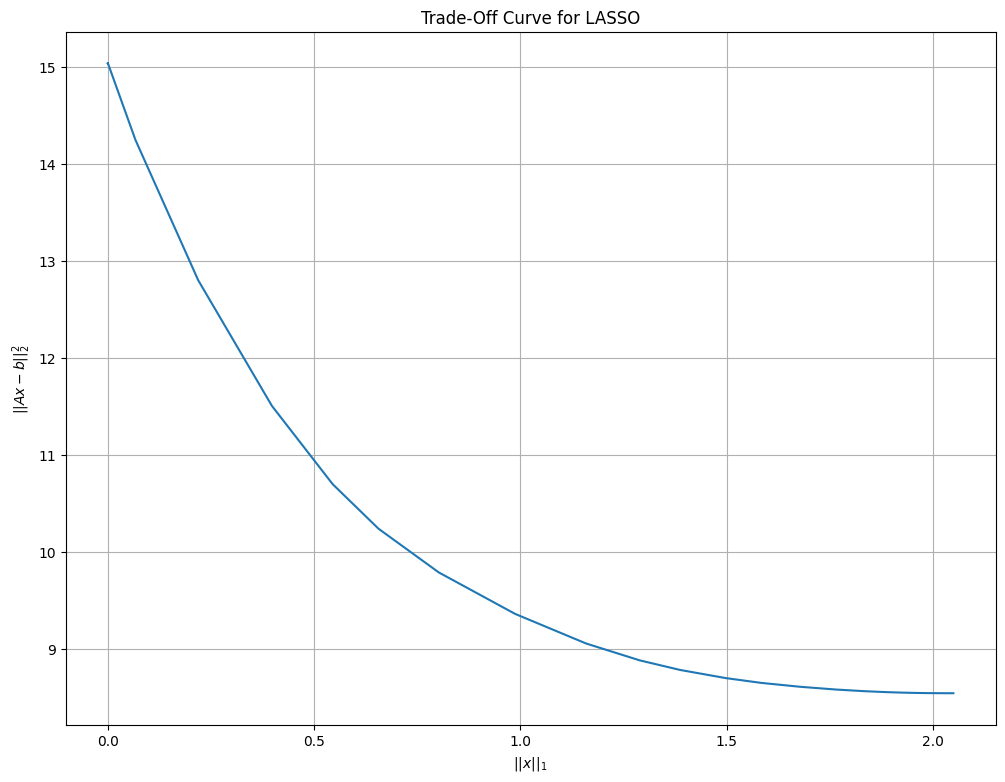

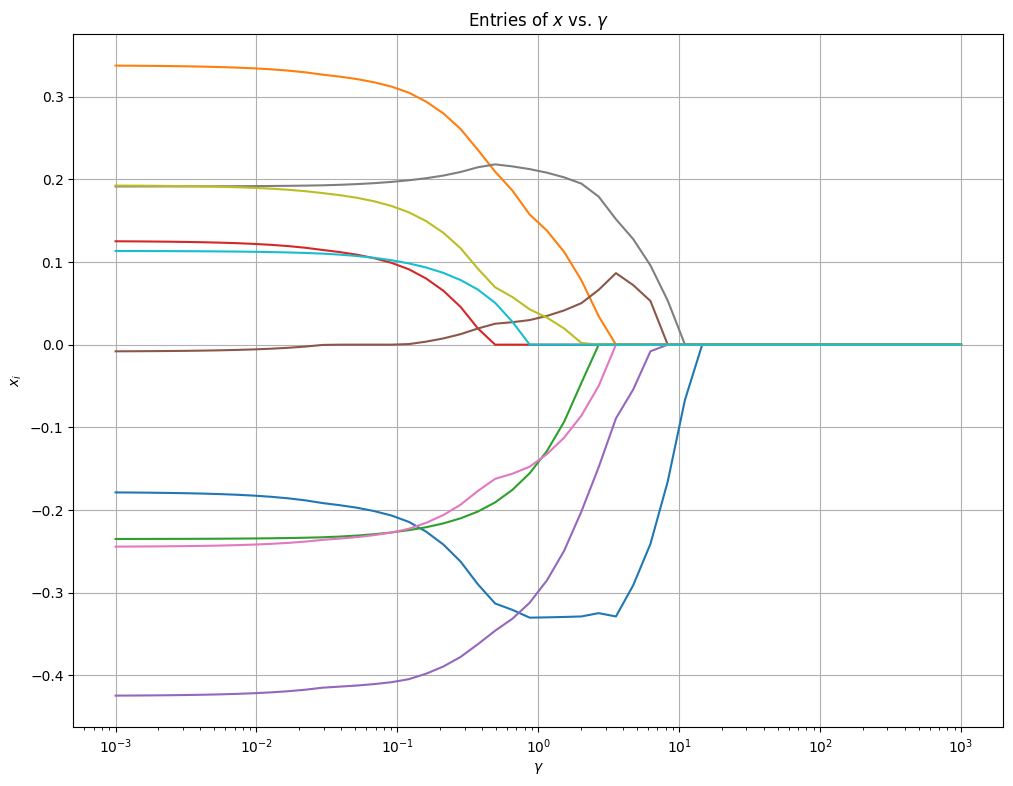

In [9]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Problem data.
n = 15
m = 10
np.random.seed(1)
A = np.random.randn(n, m)
b = np.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cp.Parameter(nonneg=True)

# Construct the problem.
x = cp.Variable(m)
err = cp.sum_squares(A@x - b)
reg = cp.norm(x, 1)
obj = cp.Minimize( err + gamma*reg )
prob = cp.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
gamma_vals = np.logspace(-3, 3)
sq_penalty = []
l1_penalty = []
x_values = []

for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(err.value)
    l1_penalty.append(reg.value)
    x_values.append(x.value)

# Plot trade-off curve.
plt.figure(figsize=(12,9), dpi=100)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel(r'$||x||_1$')
plt.ylabel(r'$||Ax-b||_2^2$')
plt.title('Trade-Off Curve for LASSO')
plt.grid()
plt.show()

# Plot entries of x vs. gamma.
plt.figure(figsize=(12,9), dpi=100)
for i in range(m):
    plt.semilogx(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$x_{i}$')
plt.title(r'Entries of $x$ vs. $\gamma$')
plt.grid()
plt.show()

<br>

Similar but different results with the sum_squares regularizer are shown below.

\begin{align*}
    \underset{x}{\minimize} \quad & \|Ax-b\|_2^2 + \gamma\|x\|_2^2
\end{align*}

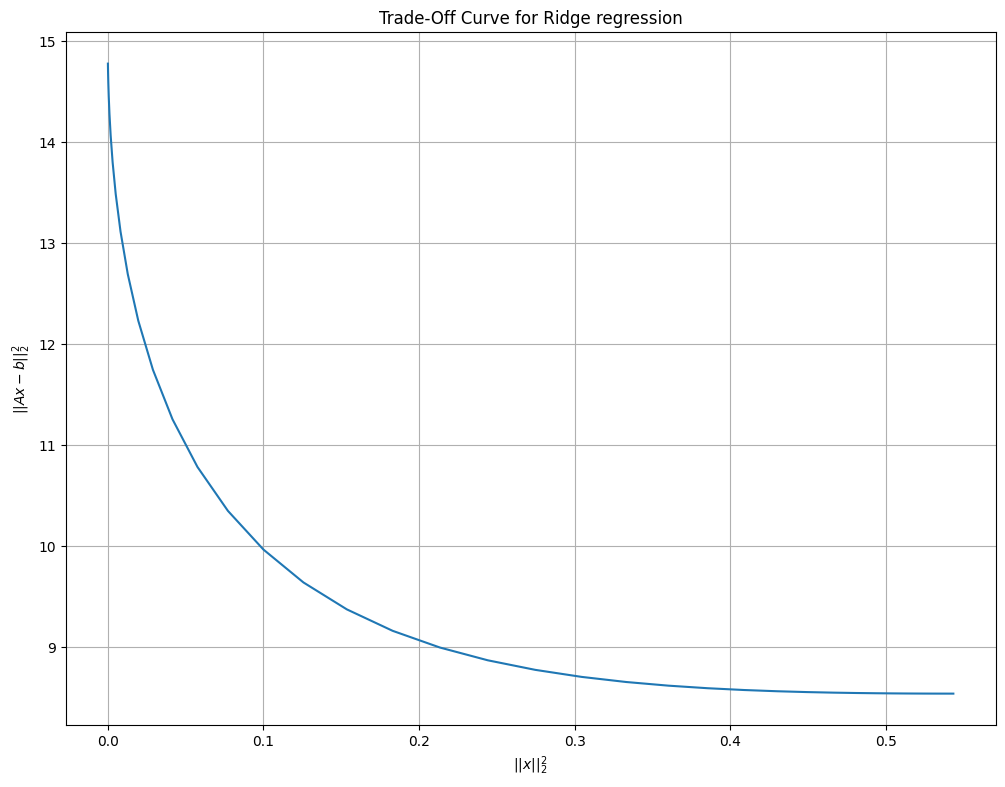

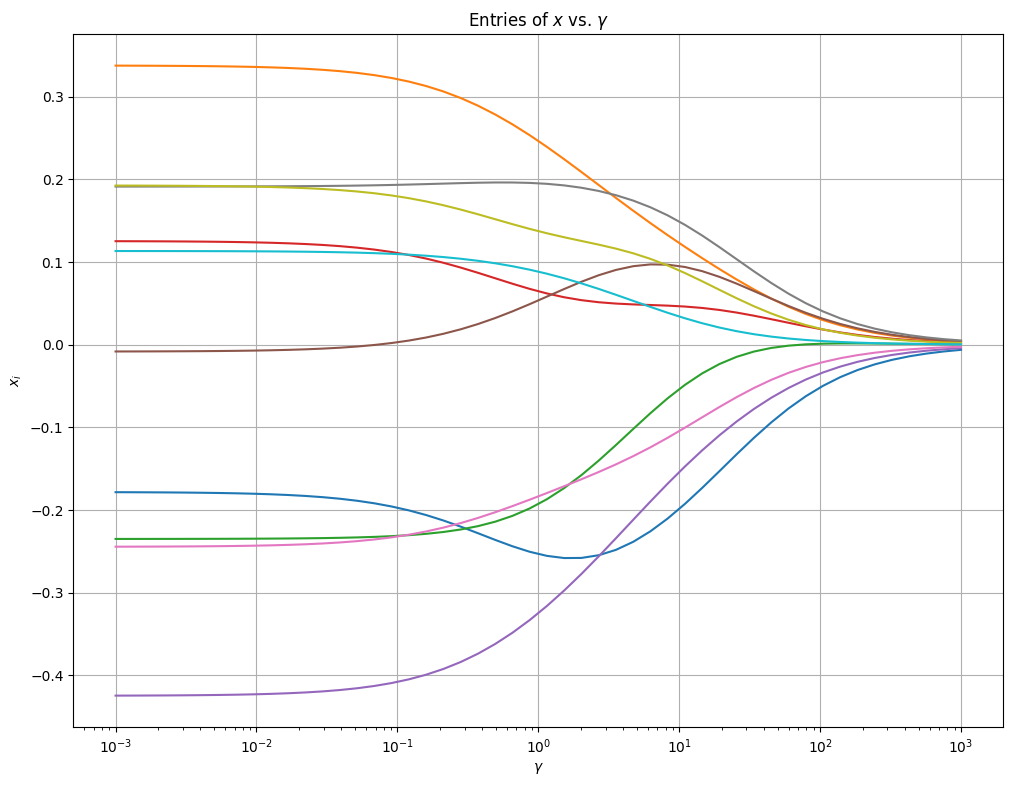

In [10]:
gamma = cp.Parameter(nonneg=True)

# Construct the problem.
x = cp.Variable(m)
err = cp.sum_squares(A@x - b)
reg = cp.sum_squares(x)

obj = cp.Minimize( err + gamma*reg )
prob = cp.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
gamma_vals = np.logspace(-3, 3)
sq_penalty = []
l2_penalty = []
x_values = []

for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(err.value)
    l2_penalty.append(reg.value)
    x_values.append(x.value)

# Plot trade-off curve.
plt.figure(figsize=(12,9), dpi=100)
plt.plot(l2_penalty, sq_penalty)
plt.xlabel(r'$||x||_2^2$')
plt.ylabel(r'$||Ax-b||_2^2$')
plt.title('Trade-Off Curve for Ridge regression')
plt.grid()
plt.show()

# Plot entries of x vs. gamma.
plt.figure(figsize=(12,9), dpi=100)
for i in range(m):
    plt.semilogx(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$x_{i}$')
plt.title(r'Entries of $x$ vs. $\gamma$')
plt.grid()
plt.show()


---
_<div style="text-align: right"> Contents mostly taken from the `cvxpy` tutorial page at https://www.cvxpy.org/tutorial/intro/index.html.</div>_

